It is a simple neural network, that will have only one input layer and one output layer. It will use the MNIST Dataset and classify the input image. 

The image is in the form of 28 by 28 grid pixel. To fed this image into the input layer we will convert it into 1 dimensional array. 

### **Importing Libraries**

In [44]:
import tensorflow as tf
from tensorflow import keras 

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Exploring the dataset that we have:

In [20]:
# Length of the train dataset
len(X_train)

60000

In [21]:
# Length of test dataset
len(X_test)

10000

Taking the first data of the dataset

In [22]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [23]:
X_train[0].shape

(28, 28)

To represent the data visually:

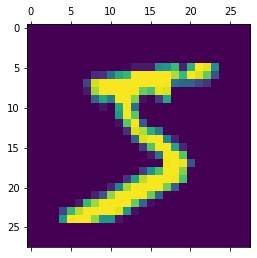

In [24]:
plt.matshow(X_train[0])

The output of the X_train[0] in the dataset y_train:

In [25]:
y_train[0]

5

### **Preparing the dataset to fed into the input layer**

Scaling the dataset to imporve the model to predict more accurately

In [26]:
X_train = X_train / 255
X_test = X_test / 255

We have to flatten (reshape) the 2D dataset into 1D dataset to fed it into the input layer of the neural network.

In [27]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

### **Creating Simple Neural Network**

The Neural Network Model has one computational layer, which will have **10 outputs**, **784 input features**, and a **sigmoid activation function** 

In [29]:
model = keras.Sequential([keras.layers.Dense(10, input_shape = (784,), activation='sigmoid')])

After building the model we have to compile the model

In [30]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

Now we supplying the training dataset to the model

In [31]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4719 - accuracy: 0.8763
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3043 - accuracy: 0.9149
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2838 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2671 - accuracy: 0.9258
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2623 - accuracy: 0.9268
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9285
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2554 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2533 - accuracy: 0.9306
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.251

### **Evaluating the Test Dataset**

In [32]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2652 - accuracy: 0.9296


[0.2652016878128052, 0.9296000003814697]

Evaluating the test dataset one at a time

In [33]:
# Storing the predicting output 
y_predicted = model.predict(X_test_flattened)

In [34]:
# The first predicted dataset
y_predicted[0]

array([3.0451715e-03, 1.0616656e-08, 3.4784436e-02, 9.6921539e-01,
       1.6413033e-03, 1.6549376e-01, 4.0801410e-08, 9.9984944e-01,
       9.1574252e-02, 7.4419105e-01], dtype=float32)

In [35]:
# Finding the maximum out of this value
np.argmax(y_predicted[0])

7

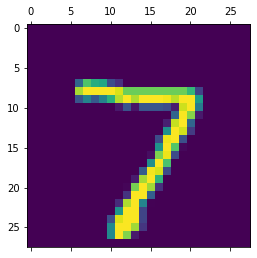

In [37]:
# Chaecking whether the prediction is correct or not
plt.matshow(X_test[0])

### **Creating a Confusion Matrix**

The confusion matrix are often created to visualized the performance of the model. It will make the comparison between the actual output and th epredicted output.

In [38]:
# We need to store the all maxvalue from the prediction matrix
y_predicted[0]

array([3.0451715e-03, 1.0616656e-08, 3.4784436e-02, 9.6921539e-01,
       1.6413033e-03, 1.6549376e-01, 4.0801410e-08, 9.9984944e-01,
       9.1574252e-02, 7.4419105e-01], dtype=float32)

In [41]:
y_predicted_label = [np.argmax(i) for i in y_predicted]
y_predicted_label[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

We have to make the coversion to compare the predicted value to the actual output value.

In [43]:
# Confusion matix
confusion_matrix = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 952,    0,    4,    2,    0,    6,   11,    2,    2,    1],
       [   0, 1108,    5,    1,    0,    1,    4,    2,   14,    0],
       [   3,    6,  951,    5,    7,    5,   12,    8,   32,    3],
       [   3,    0,   29,  903,    1,   30,    3,    8,   26,    7],
       [   1,    1,    6,    1,  915,    0,   12,    4,    8,   34],
       [   7,    2,    7,   25,    9,  783,   13,    7,   33,    6],
       [   6,    3,   10,    1,    7,   10,  917,    1,    3,    0],
       [   1,    6,   27,    2,    8,    1,    0,  942,    2,   39],
       [   5,    5,    8,   13,    9,   19,   10,    6,  889,   10],
       [   7,    5,    3,    7,   22,    5,    0,   13,   11,  936]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

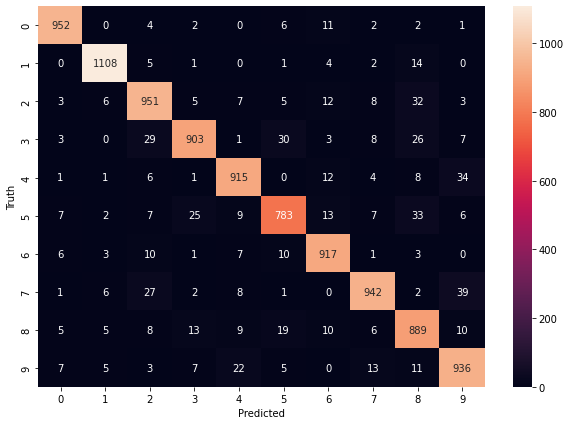

In [46]:
# To visualize the comparision
plt.figure(figsize= (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')



---



After comparing the actual and the predicted value we have realised that there was significant amounts of errors. 

To solve this proble(*To minimize the error*) we will add hidden layers:

In [48]:
model = keras.Sequential([
                          keras.layers.Dense(100, input_shape = (784,), activation='relu'),
                          keras.layers.Dense(10, activation= 'sigmoid')
                          ])

In [49]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2781 - accuracy: 0.9213
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1277 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0670 - accuracy: 0.9798
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0336 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0274 - accuracy: 0.9918
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9925
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

The accurary value has increased as we have added one hidden layer.

In [51]:
# Evaluating the model using test dataset
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0914 - accuracy: 0.9748


[0.09144201129674911, 0.9747999906539917]

In [53]:
# Creating the confusion matrix
y_predicted = model.predict(X_test_flattened)
y_predicted_label = [np.argmax(i) for i in y_predicted]

# Confusion matix
confusion_matrix = tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    1,    0,    2,    2,    3,    2,    1,    2,    2],
       [   0, 1126,    4,    0,    0,    0,    2,    0,    3,    0],
       [   4,    1, 1007,    4,    4,    0,    2,    5,    5,    0],
       [   0,    0,    1,  996,    0,    0,    0,    5,    3,    5],
       [   1,    0,    2,    0,  960,    1,    7,    0,    1,   10],
       [   1,    0,    0,   36,    2,  834,    6,    0,    8,    5],
       [   3,    3,    2,    1,    4,    2,  941,    0,    2,    0],
       [   1,    5,   10,    3,    0,    0,    0,  993,    4,   12],
       [   1,    1,    3,   12,    5,    4,    2,    3,  942,    1],
       [   1,    2,    0,    9,    5,    1,    0,    3,    4,  984]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

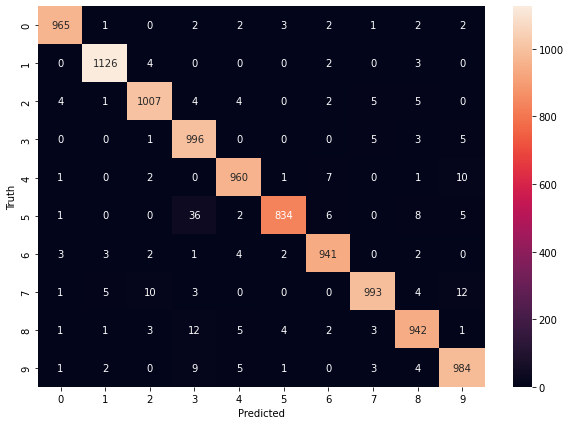

In [54]:
# To visualize the comparision
plt.figure(figsize= (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')